<ipython-input-213-cf9f3029d481>:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t, f, LineWidth=1, label="Clean")


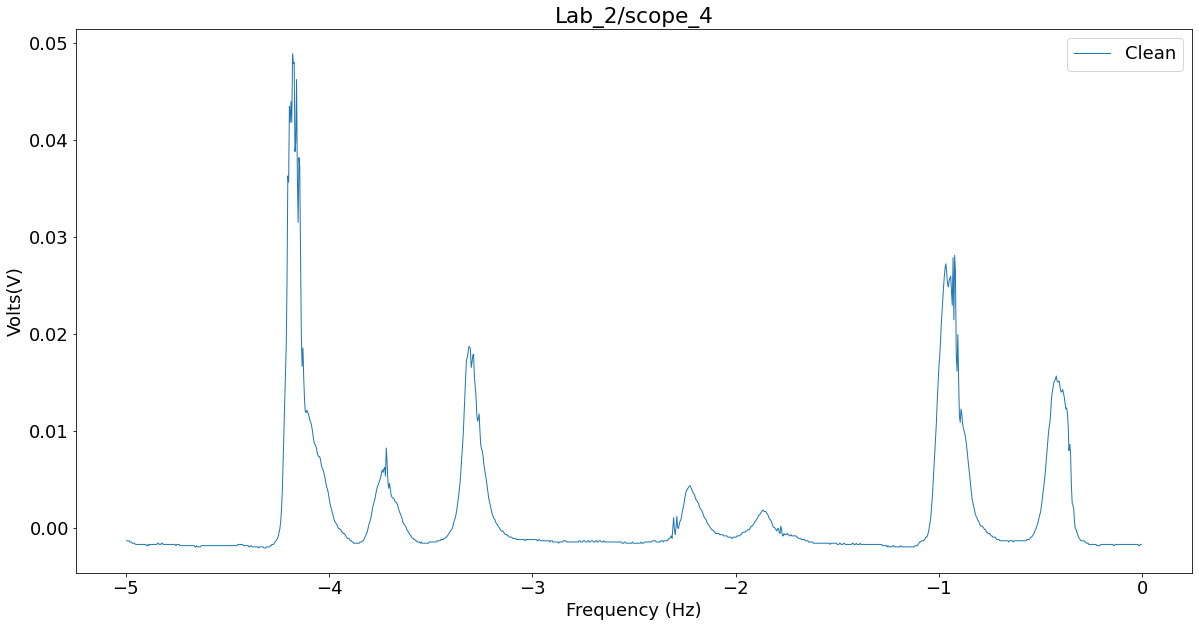

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 18})

# Plotting a line graph from data acquired from CSV
filename = 'data/Lab_2/scope_4.csv'
df = pd.read_csv(filename, delimiter=',', skiprows=0)

dt = 0.01
t = df['x_axis']
f = df['channel_2']  # Sum of two frequencies

plt.plot(t, f, LineWidth=1, label="Clean")
plt.xlabel("Frequency (Hz)")
title = filename.replace("data/", "")
title = title.replace(".csv", "")
plt.title(title)
plt.ylabel("Volts(V)")
plt.legend()
plt.show()

<ipython-input-210-96fda1e8fc9a>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t, f, color='b', LineWidth=2, label="Clean")
<ipython-input-210-96fda1e8fc9a>:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label="Noisy")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


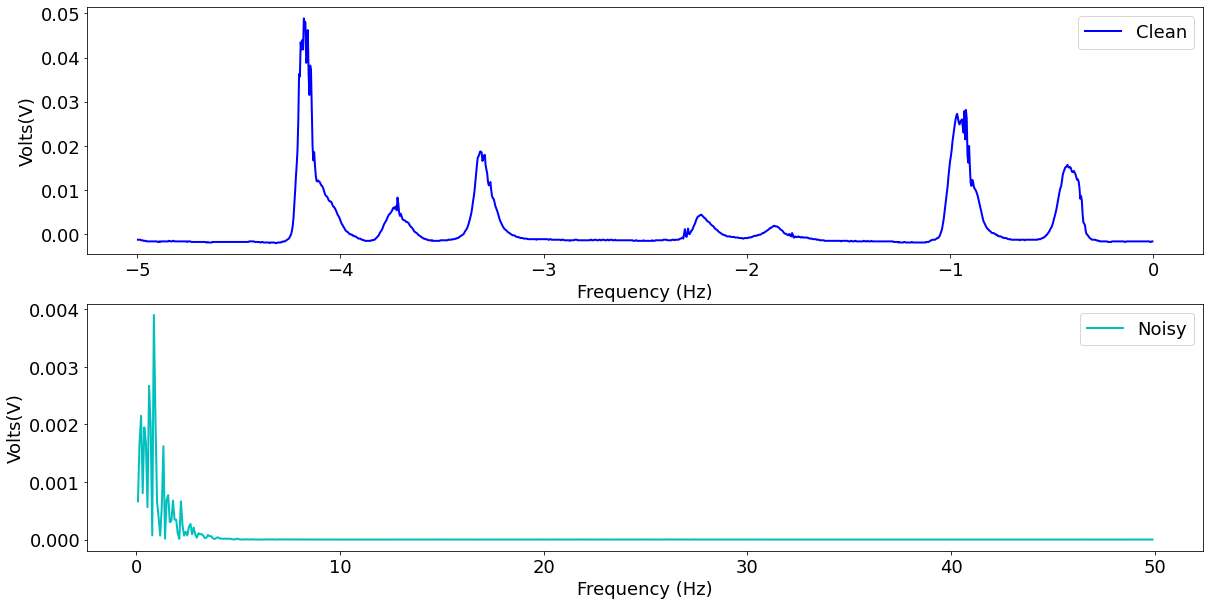

In [210]:
## Compute the Fast Fourier Transform (FFT)

n = len(t)                     
fhat = np.fft.fft(f,n)       
PSD = fhat * np.conj(fhat)/n 
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t, f, color='b', LineWidth=2, label="Clean")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Volts(V)")
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label="Noisy")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Volts(V)")
plt.legend()

plt.show()


In [211]:
indices = PSD > 0.00005
PSDclean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

<ipython-input-212-ea35cda53b1e>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t, f, color='c', LineWidth=1.5, label="Noisy")
<ipython-input-212-ea35cda53b1e>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t, ffilt, color='k', LineWidth=2, label="Filtered")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-212-ea35cda53b1e>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label="Noisy")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-p

<function matplotlib.pyplot.show(close=None, block=None)>

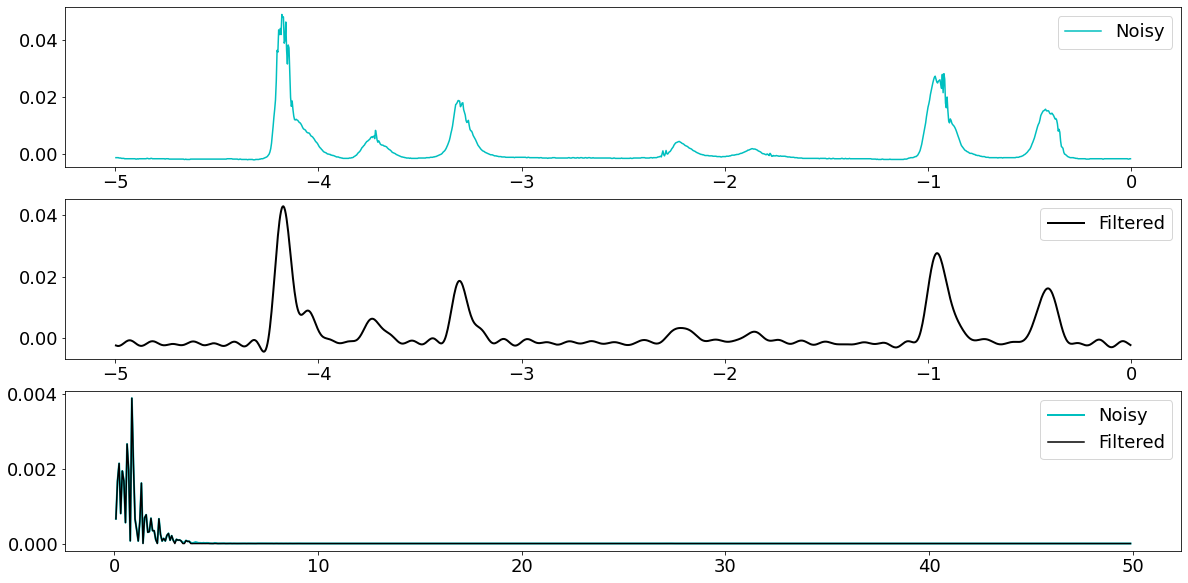

In [212]:
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t, f, color='c', LineWidth=1.5, label="Noisy")
plt.legend()

plt.sca(axs[1])
plt.plot(t, ffilt, color='k', LineWidth=2, label="Filtered")
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label="Noisy")
plt.plot(freq[L], PSDclean[L], color='k', LineWidth=1.5, label="Filtered")
plt.legend()

plt.show